#Section 01. 상관분석 초 통계를 이용한 상관계수 도출

In [1]:
train=[[25, 100], [52, 256], [38, 152], [32, 140], [25, 150]]

In [2]:
x=[i[0] for i in train]
y=[j[1] for j in train]
x,y

([25, 52, 38, 32, 25], [100, 256, 152, 140, 150])

## 1. 기초 통계 함수 구현하기
###평균

In [3]:
def mean(x):
  return sum(x) / len(x)
mean(x), mean(y)

(34.4, 159.6)

### 개별 값과 평균의 차

In [4]:
def d_mean(x):
  x_mean=mean(x)
  return [i - x_mean for i in x]
  
d_mean(x), d_mean(y)

([-9.399999999999999,
  17.6,
  3.6000000000000014,
  -2.3999999999999986,
  -9.399999999999999],
 [-59.599999999999994,
  96.4,
  -7.599999999999994,
  -19.599999999999994,
  -9.599999999999994])

In [5]:
x1=d_mean(x)
mean(x1)

1.4210854715202005e-15

### 내적

In [6]:
def dot(x, y):
  return sum([x*y for x, y in zip(x, y)])
dot(x, y)

29818

### 제곱의 합

In [7]:
def sum_of_squares(v):
  return dot(v, v)
sum_of_squares(x), sum_of_squares(y)

(6422, 140740)

### 분산

In [8]:
def variance(x):
  n=len(x)
  d=d_mean(x)
  return sum_of_squares(d) / (n-1)
variance(x)

126.3

### 표준편차

In [9]:
def standard_deviation(x):
  return variance(x)**0.5
  
standard_deviation(x)

11.23832727766904

###<여기서 잠깐> math 라이브러리의 sqrt 함수로 표준편차 함수 구현하기

In [10]:
import math
def standard_deviation(x):
 return math.sqrt(variance(x))
standard_deviation(x)

11.23832727766904

### 공분산

In [11]:
def covariance(x, y):
  n=len(x)
  return dot(d_mean(x), d_mean(y)) / (n-1)
  
covariance(x, y)


591.6999999999999

###상관계수

In [12]:
def correlation(x, y):
  stdev_x=standard_deviation(x) # 표준편차(x) 할당
  stdev_y=standard_deviation(y) # 표준편차(y) 할당
  if stdev_x > 0 and stdev_y > 0: # stdev_x와 stdev_y가 0을 초과하면
    return covariance(x, y) / (stdev_x * stdev_y) # 상관계수 결과 반환
  else:
    return 0
    
correlation(x, y)

0.9103634578175528

##2. 넘파이 함수로 기초 통계 구하기

In [13]:
import numpy as np
x1=np.array(x)
x1.mean(), x1.var(), x1.std()

(34.4, 101.03999999999999, 10.05186549850325)

In [14]:
np.cov(x1,y), np.corrcoef(x1,y)

(array([[ 126.3,  591.7],
        [ 591.7, 3344.8]]),
 array([[1.        , 0.91036346],
        [0.91036346, 1.        ]]))

In [15]:
np.cov(x1,y)[0][1], np.corrcoef(x1,y)[0][1]

(591.6999999999999, 0.9103634578175529)

#Section 02. 회귀분석1 최소자승법을 이용한 회귀계수 도출
## 1. 회귀계수 구하기

In [16]:
def OLS(x,y):
  beta=covariance(x, y)/variance(x) # 공분산(x,y)/분산(x)
  alpha=mean(y)-beta*mean(x) # 평균(y)–beta*평균(x)
  return [alpha, beta]
  
OLS(x,y)

[-1.5597783056215349, 4.684877276326207]

In [17]:
def OLS_fit(x,y):
  beta=(correlation(x, y)*standard_deviation(y))/standard_deviation(x)
  # beta=(상관계수(x,y)*표준편차(y))/표준편차(x)
  alpha=mean(y)-beta*mean(x)
  return [alpha, beta]

OLS_fit(x,y)

[-1.5597783056215064, 4.6848772763262065]

##2. 예측값 구하기

In [18]:
def predict(alpha, beta,train, test):
  predictions=list() # 예측값 선언
  x=[i[0] for i in train] # 변수 x에 train 데이터의 아파트 평수 저장
  y=[j[1] for j in train] # 변수 y에 train 데이터의 전력량 저장
  alpha, beta=OLS_fit(x,y) # alpha와 beta에 OSL_fit 함수의 반환값 저장
  for i in test:
    yhat=alpha+beta*i[0]
    predictions.append(yhat) # predictions 리스트에 변수 yhat에 입력된 값 추가
  return predictions # predictions 리스트 값 반환
  
train=[[25,100],[52,256],[38,152],[32,140],[25,150]]
alpha,beta=OLS_fit(x,y)
pr=predict(alpha, beta, train, train) # predict 함수의 반환값을 변수 pr에 할당
print(pr) # 변수 pr에 할당된 prediction 값 출력

[115.56215360253366, 242.05384006334123, 176.46555819477433, 148.3562945368171, 115.56215360253366]


###<여기서 잠깐> matplotlib 라이브러리를 이용한 산점도 그래프 표시

In [19]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

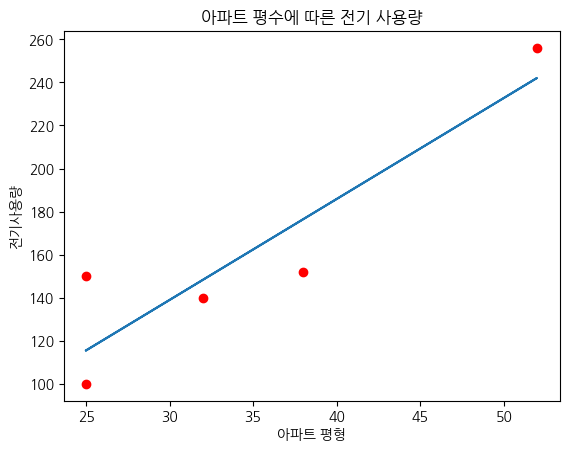

In [20]:
# matplotlib 라이브러리 임포트, 글꼴 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.title('아파트 평수에 따른 전기 사용량')# 그래프 제목 설정
plt.scatter(x, y, c='red') # 산점도 차트 표시. x축, y축 데이터 설정. 색상은 red로 설정
plt.plot(x,pr) # 라인 그래프 표시. x축, y축은 변수 pr에 할당된 값 사용
plt.xlabel('아파트 평형') # x축 제목
plt.ylabel('전기사용량') # y축 제목
plt.show()

##3. SSE 구하기

In [21]:
def SSE(alpha, beta, train, test):
  sse=0
  for i in test:
    error=(i[1]-(alpha+beta*i[0]))**2 # (실제값-예측값)의 제곱
    sse=error+sse
  return sse
  
SSE(alpha, beta, train, train)


2291.032462391132

##4. SST 구하기

In [22]:
def SST(alpha, beta, train, test):
  sst=0
  x=[i[0] for i in train]
  y=[j[1] for j in train]
  for i in test:
    sum_ds=(i[1]-mean(y))**2
    sst=sum_ds+sst
  return sst
  
SST(alpha, beta, train, train)

13379.2

##5. 결정계수 구하기

In [23]:
def R_squared(alpha, beta, train, test):
  return 1.0-(SSE(alpha, beta, train, test)/SST(alpha, beta, train, test))
  
R_squared(alpha, beta, train, train)

0.8287616253295316

In [24]:
train=[[25, 100], [52, 256], [38, 152], [32, 140], [25, 150]]
x=[i[0] for i in train]
y=[j[1] for j in train]
import statsmodels.api as sms
_X=sms.add_constant(x)
model=sms.OLS(y, _X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     14.52
Date:                Sun, 21 May 2023   Prob (F-statistic):             0.0318
Time:                        09:04:04   Log-Likelihood:                -22.413
No. Observations:                   5   AIC:                             48.83
Df Residuals:                       3   BIC:                             48.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5598     44.063     -0.035      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## 6. 예측력 구하기

In [25]:
test=[[45,183],[40,175],[55,203],[28,152],[42,198]]
test

[[45, 183], [40, 175], [55, 203], [28, 152], [42, 198]]

###종속변수 값 예측하기

In [26]:
def predict(alpha, beta, train, test):
  predictions=list()
  x=[i[0] for i in train]
  y=[j[1] for j in train]
  alpha, beta=OLS_fit(x,y)
  for i in test:
    yhat=alpha+beta*i[0]
    predictions.append(yhat)
  return predictions
  
predict(alpha, beta, train, test)

[209.2596991290578,
 185.83531274742674,
 256.1084718923198,
 129.61678543151228,
 195.20506730007918]

### 예측 결과 평가하기

In [27]:
actual=[j[1] for j in test]
predicted=predict(alpha, beta, train, test)
actual, predicted

([183, 175, 203, 152, 198],
 [209.2596991290578,
  185.83531274742674,
  256.1084718923198,
  129.61678543151228,
  195.20506730007918])

In [28]:
from math import sqrt
def RMSE(actual, predicted): # 변수 RMSE 선언, 인자는 actual, predicted
  sum_error=0.0 # 변수 sum_error 값을 0.0으로 초기화
  for i in range(len(actual)): # for 문으로 변수 actual에 저장된 값만큼 반복
    prediction_error=predicted[i]-actual[i] # 예측값[i]-실제값[i] 반환
    sum_error+=(prediction_error**2) # prediction_error 제곱 누적
    mean_error=sum_error/float(len(actual)) # sum_error/len(actual) 값 저장
  return sqrt(mean_error) # mean_error 제곱근 반환
  
RMSE(actual, predicted)

28.762147105654535

#Section 03. 회귀분석2 경사하강법을 이용한 회귀계수 도출

##1. 회귀계수 구하기

In [30]:
dataset=[[25,100],[52,256],[38,152],[32,140],[25,150],[45,183],[40,175],[55,203],[28,152],[42,198]]
train=dataset[:5]
test=dataset[5:]
print('학습 데이터(train): {}, 테스트 데이터(test): {}'.format(train, test))

학습 데이터(train): [[25, 100], [52, 256], [38, 152], [32, 140], [25, 150]], 테스트 데이터(test): [[45, 183], [40, 175], [55, 203], [28, 152], [42, 198]]


In [31]:
coef=[0.0 for i in range(len(train[0]))] # 회귀계수 값 초기화
coef

[0.0, 0.0]

In [32]:
def predict(row, coef):
  # yhat=coef[0]+coef[i+1]*row[i]
  yhat=coef[0] # 절편
  for i in range(len(row)-1):
    yhat+=coef[i+1]*row[i] # 회귀계수*학습 데이터
  return yhat
  

In [37]:
def coefficients_sgd(train, l_rate, n_epoch): # 학습 데이터, 학습률, 학습 횟수
  coef=[0.0 for i in range(len(train[0]))] # 절편과 회귀계수 모두 0으로 초기화
  for epoch in range(n_epoch): # 학습 횟수만큼 반복
    sse=0 # 오차 제곱합
    for row in train: # 학습 데이터를 차례로 row에 넘겨 predict 함수 실행
      yhat=predict(row, coef) # 예측값
      error=yhat-row[-1] # 오차
      sse+=error**2 # 오차 제곱
      coef[0]=coef[0] - l_rate * error # 절편 수정
      for i in range(len(row)-1):
        coef[i+1]=coef[i+1]-l_rate*error*row[i]
      return coef, sse

In [38]:
import math
def coefficients_sgd(train, l_rate, n_epoch):
  coef=[0.0 for i in range(len(train[0]))] #초기 회귀계수 값
  for epoch in range(n_epoch):
    sum_error=0
    for row in train:
      yhat=predict(row, coef)
      error=row[-1]-yhat
      sum_error+=(error**2)
      coef[0]=coef[0]+l_rate*error
      for i in range(len(row)-1):
        coef[i+1]=coef[i+1]+l_rate*error*row[i]
 # print('>epoch=%d, lrate=%.5f, error=%.2f' % (epoch,l_rate,sum_error))
  return coef, math.sqrt(sum_error/len(train))

In [39]:
l_rate=0.0001
n_epoch=10
coef=coefficients_sgd(train, l_rate, n_epoch)
coef

([0.12048176774574783, 4.6641909860014845], 22.58718935323457)

## 2. 예측값 구하고 결과 평가하기

In [44]:
dataset=[[25,100],[52,256],[38,152],[32,140],[25,150],[45,183],[40,175],[55,203],[28,152],[42,198]]
train=dataset[:5]
test=dataset[5:]
actual=[j[1] for j in test]
l_rate=0.0001
n_epoch=10
alpha,beta=coefficients_sgd(train,l_rate,n_epoch)[0][0],coefficients_sgd(train, l_rate, n_epoch)[0][1]

alpha,beta

(0.12048176774574783, 4.6641909860014845)

In [45]:
def predicted(train, test, alpha, beta):
  predictions=list()
  x=[i[0] for i in train]
  y=[j[1] for j in train]
  for i in test:
    yhat=alpha+beta*i[0]
    predictions.append(yhat)
  return predictions
  
pred=predicted(train, test, alpha, beta)
pred

[210.00907613781257,
 186.68812120780515,
 256.6509859978274,
 130.71782937578732,
 196.0165031798081]

In [46]:
from math import sqrt

def RMSE(actual, predicted):
  sum_error=0.0
  for i in range(len(actual)):
    prediction_error=predicted[i]-actual[i]
    sum_error+=(prediction_error**2)

  mean_error=sum_error/float(len(actual))
  return sqrt(mean_error)
  
RMSE(actual, pred)

28.987568769523886

## 3 종합 및 심화

In [47]:
def sgd1(sq_error, sq_error_grad, x, y, theta_0, l_rate_0):
  data=list(zip(x, y))
  theta=theta_0
  l_rate=l_rate_0
  min_value=float("inf")
  iterations=0
  while iterations < 5:
    value=sum(sq_error(xi, yi, theta) for xi, yi in data)
    if value < min_value:
      min_theta, min_value=theta, value
      iterations=0
      l_rate=l_rate_0
    else:
      iterations+=1
      l_rate*=0.9
    for xi, yi in data:
      gradient_i=sq_error_grad(xi, yi, theta)
      theta=vector_subtract(theta, scalar_multiply(l_rate, gradient_i))
      # print("min_theta",min_theta)
  return min_theta

In [48]:
def sq_error(xi, yi,theta):
  alpha, beta=theta
  error=yi-(beta * xi + alpha)
  sq_error=error**2
  return sq_error

def sq_error_grad(xi, yi, theta):
  alpha, beta=theta
  return [-2 *(yi-(beta * xi + alpha)),-2 *(yi-(beta * xi + alpha)) * xi]

def vector_subtract(v, w):
  return [vi - wi for vi, wi in zip(v,w)]

def scalar_multiply(c, v):
  return [c * vi for vi in v]

In [49]:
dataset=[[25,100],[52,256],[38,152],[32,140],[25,150],[45,183],[40,175],[55,203],[28,152],[42,198]]
train=dataset[:5]
test=dataset[5:]
x=[i[0] for i in train]
y=[j[1] for j in train]
l_rate_0=0.001
theta_0=[0,0]
sgd1(sq_error, sq_error_grad, x, y, theta_0, l_rate_0)

[-0.10951732977330134, 5.486891250958579]